In [1]:
#Exploratory Data Analysis IPL Matches
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import io
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
from sklearn.metrics import make_scorer, accuracy_score,precision_score
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score

In [2]:
from google.colab import files

uploaded=files.upload()

Saving matches.csv to matches.csv


In [4]:
matches_data=pd.read_csv(io.BytesIO(uploaded['matches.csv']))
print(matches_data)

        id  season           city        date                        team1  \
0        1    2017      Hyderabad  2017-04-05          Sunrisers Hyderabad   
1        2    2017           Pune  2017-04-06               Mumbai Indians   
2        3    2017         Rajkot  2017-04-07                Gujarat Lions   
3        4    2017         Indore  2017-04-08       Rising Pune Supergiant   
4        5    2017      Bangalore  2017-04-08  Royal Challengers Bangalore   
..     ...     ...            ...         ...                          ...   
751  11347    2019         Mumbai    05/05/19        Kolkata Knight Riders   
752  11412    2019        Chennai    07/05/19          Chennai Super Kings   
753  11413    2019  Visakhapatnam    08/05/19          Sunrisers Hyderabad   
754  11414    2019  Visakhapatnam    10/05/19               Delhi Capitals   
755  11415    2019      Hyderabad    12/05/19               Mumbai Indians   

                           team2                  toss_winner t

In [5]:
matches_data.head(5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [6]:
matches_data.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [7]:
matches_data['city'].fillna('Abu Dhabi',inplace=True)
matches_data['winner'].fillna('Draw', inplace = True)

In [8]:
matches_data.replace("Rising Pune Supergiant","Rising Pune Supergiants", inplace=True)
matches_data.replace('Deccan Chargers', 'Sunrisers Hyderabad', inplace=True)
matches_data.replace('Delhi Daredevils', 'Delhi Capitals', inplace=True)

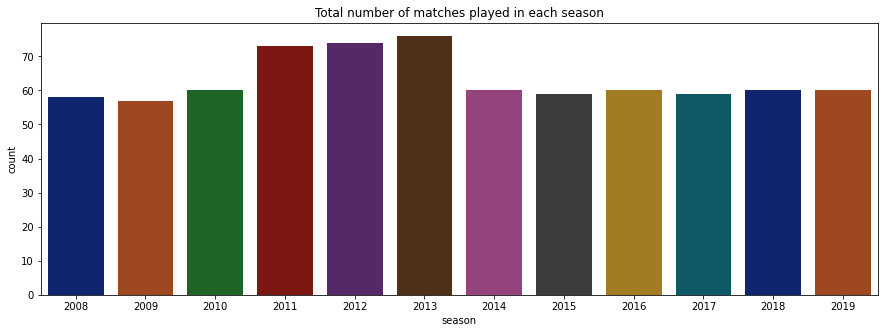

In [10]:
plt.subplots(figsize = (15,5))
sns.countplot(x = 'season' , data = matches_data, palette='dark')
plt.title('Total number of matches played in each season')
plt.show()

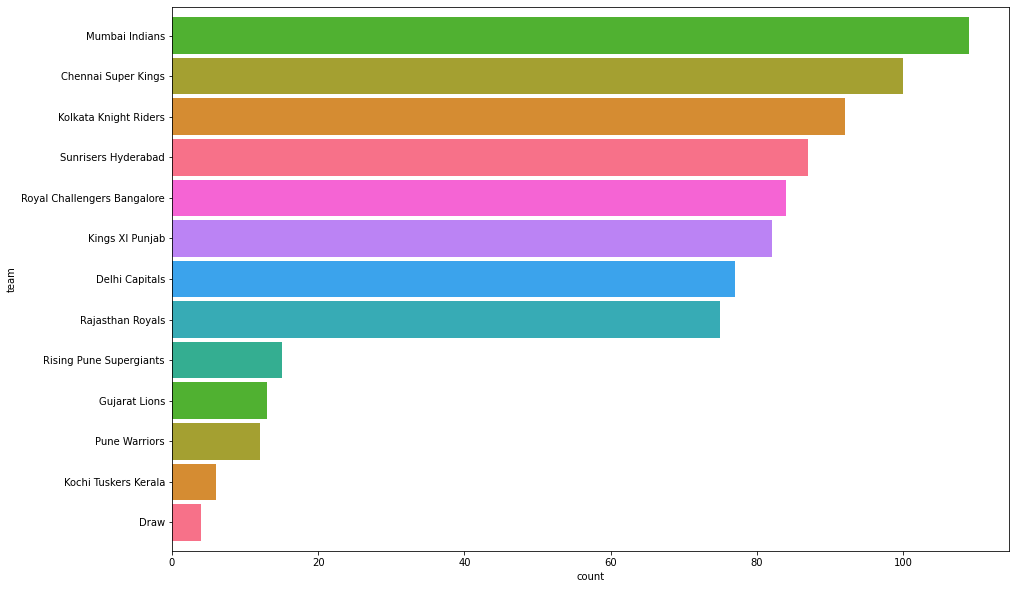

In [11]:
plt.subplots(figsize=(15,10))
ax = matches_data['winner'].value_counts().sort_values(ascending=True).plot.barh(width=.9,color=sns.color_palette("husl", 9))
ax.set_xlabel('count')
ax.set_ylabel('team')
plt.show()

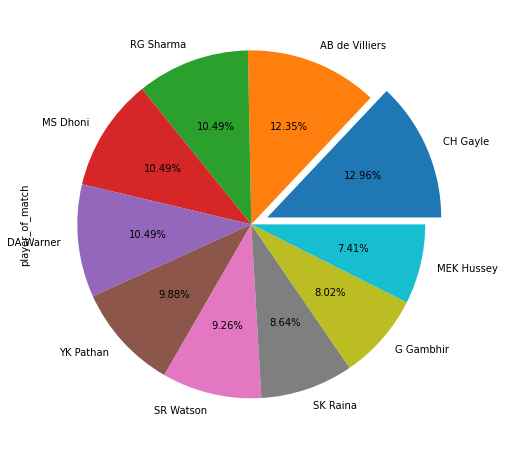

In [24]:
#Top Player Of The Matches Winner
plt.figure(figsize=(13,8))
explode=[0.1,0,0,0,0,0,0,0,0,0]
matches_data['player_of_match'].value_counts().head(10).plot(kind='pie',autopct='%0.2f%%',explode=explode)
plt.show()

In [12]:
matches_data.replace({"Mumbai Indians":"MI", "Delhi Capitals":"DC", 
               "Sunrisers Hyderabad":"SRH", "Rajasthan Royals":"RR", 
               "Kolkata Knight Riders":"KKR", "Kings XI Punjab":"KXIP", 
               "Chennai Super Kings":"CSK", "Royal Challengers Bangalore":"RCB",
              "Kochi Tuskers Kerala":"KTK", "Rising Pune Supergiants":"RPS",
              "Gujarat Lions":"GL", "Pune Warriors":"PW"}, inplace=True)
encode = {'team1': {'KKR':1,'CSK':2,'RR':3,'MI':4,'SRH':5,'KXIP':6,'RCB':7,'DC':8,'KTK':9,'RPS':10,'GL':11,'PW':12},
         'team2': {'KKR':1,'CSK':2,'RR':3,'MI':4,'SRH':5,'KXIP':6,'RCB':7,'DC':8,'KTK':9,'RPS':10,'GL':11,'PW':12},
         'toss_winner': {'KKR':1,'CSK':2,'RR':3,'MI':4,'SRH':5,'KXIP':6,'RCB':7,'DC':8,'KTK':9,'RPS':10,'GL':11,'PW':12},
          'winner': {'KKR':1,'CSK':2,'RR':3,'MI':4,'SRH':5,'KXIP':6,'RCB':7,'DC':8,'KTK':9,'RPS':10,'GL':11,'PW':12,'Draw':13}}
matches_data.replace(encode, inplace=True)
matches_data.head(5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,5,7,7,field,normal,0,5,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,4,10,10,field,normal,0,10,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,11,1,1,field,normal,0,1,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,10,6,6,field,normal,0,6,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,7,8,7,bat,normal,0,7,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [13]:
dicVal = encode['winner']
train = matches_data[['team1','team2','city','toss_decision','toss_winner','venue','winner']]
train.head(5)

,team1,team2,city,toss_decision,toss_winner,venue,winner
0,5,7,Hyderabad,field,7,"Rajiv Gandhi International Stadium, Uppal",5
1,4,10,Pune,field,10,Maharashtra Cricket Association Stadium,10
2,11,1,Rajkot,field,1,Saurashtra Cricket Association Stadium,1
3,10,6,Indore,field,6,Holkar Cricket Stadium,6
4,7,8,Bangalore,bat,7,M Chinnaswamy Stadium,7


In [14]:
df = pd.DataFrame(train)
var_mod = ['city','toss_decision','venue']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])
df.dtypes

team1            int64
team2            int64
city             int64
toss_decision    int64
toss_winner      int64
venue            int64
winner           int64
dtype: object

In [15]:
X = df[['team1', 'team2', 'venue']]
y = df[['winner']]
sc = StandardScaler()
X = sc.fit_transform(X)

In [16]:
logistic_model = LogisticRegression()
logistic_model.fit(X,y)
print("Logistic Regression accuracy: ",(logistic_model.score(X,y))*100)
Random_model = RandomForestClassifier()
Random_model.fit(X,y)
print("Random Forest accuracy: ", (Random_model.score(X,y))*100)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Logistic Regression accuracy:  25.264550264550266
Random Forest accuracy:  81.48148148148148


In [17]:
test_data = pd.read_csv('matches.csv')
encode = {'team1': {'KKR':1,'CSK':2,'RR':3,'MI':4,'SRH':5,'KXIP':6,'RCB':7,'DC':8,'KTK':9,'RPS':10,'GL':11,'PW':12},
         'team2': {'KKR':1,'CSK':2,'RR':3,'MI':4,'SRH':5,'KXIP':6,'RCB':7,'DC':8,'KTK':9,'RPS':10,'GL':11,'PW':12}}
test_data.replace(encode,inplace=True)
var_mod = ['venue']
le = LabelEncoder()
for i in var_mod:
    test_data[i] = le.fit_transform(test_data[i])

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [19]:
Lr=RandomForestRegressor(n_estimators=50,max_depth=5)
Lr_model=Lr.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
